# Descriptives Sample

In [2]:
NAME = '08-01_descriptives_sample'
PROJECT = 'conference-calls-sentiment'
PYTHON_VERSION = '3.7.0'

### Imports

In [3]:
import os
import re
import numpy as np
import pandas as pd

### Settings

In [4]:
workdir = re.sub("(?<={})[\w\W]*".format(PROJECT), "", os.getcwd())
os.chdir(workdir)

---
# Main Code

## Dataset

In [4]:
dataset = pd.read_feather(os.path.join('2_pipeline', '07-02_dataset_construction', 'out', 'dataset.feather'))

In [5]:
descriptive_columns = {'lm_tone': '$Tone_{LM}$',
                       'finbert_tone': '$Tone_{FinBERT}$',
                       'car_st': '$CAR[-1,+1]$',
                       'surprise': '$Surprise$',
                       'size': '$Size$',
                       'roa': '$ROA$',
                       'leverage': '$Leverage$',
                       'loss': '$Loss$',
                       'capex': '$Capex$'}

In [6]:
descriptives = (dataset
                .drop(columns=['gvkey', 'year'])
                .dropna()
                .filter(descriptive_columns.keys())
                .rename(descriptive_columns, axis=1)
                .describe().transpose()
                .filter(['mean', 'std', '25%', '50%', '75%', 'count'])
                .round(3)
                .assign(count=lambda x: x['count'].apply(lambda x : "{:,.0f}".format(x)))
                .rename(columns={'mean': 'Mean', 'std': 'Std. Dev.', '25%': 'Pctl(25)',
                                 '50%': 'Median', '75%': 'Pctl(75)', 'count': 'N'}))
descriptives

,Mean,Std. Dev.,Pctl(25),Median,Pctl(75),N
$Tone_{LM}$,0.154,0.242,0.000,0.172,0.326,"21,966"
$Tone_{FinBERT}$,0.302,0.272,0.126,0.322,0.500,"21,966"
"$CAR[-1,+1]$",0.098,6.074,-2.893,0.110,3.231,"21,966"
$Surprise$,1.381,16.842,0.885,1.331,1.821,"21,966"
$Size$,9.792,1.118,9.037,9.669,10.442,"21,966"
$ROA$,1.609,2.453,0.610,1.417,2.539,"21,966"
$Leverage$,0.233,0.165,0.115,0.213,0.323,"21,966"
$Loss$,0.082,0.274,0.000,0.000,0.000,"21,966"
$Capex$,2.367,2.777,0.592,1.479,3.137,"21,966"


In [7]:
correlation = (dataset
               .drop(columns=['gvkey', 'year'])
               .filter(descriptive_columns.keys())
               .rename(descriptive_columns, axis=1)
               .corr()
               .apply(lambda s: s.apply(lambda x: f'{x:.3f}')))

# Convert table to one-sided
for i, _ in enumerate(correlation):
    for j, _ in enumerate(correlation):
        if i < j:
            correlation.iloc[i, j] = ''

# Fix index and columns
correlation.index = [f'({i+1}) {index}' for i, index in enumerate(correlation.columns)]
correlation.columns = [f'({i+1})' for i, _ in enumerate(correlation.columns)]

correlation

,(1),(2),(3),(4),(5),(6),(7),(8),(9)
(1) $Tone_{LM}$,1.000,,,,,,,,
(2) $Tone_{FinBERT}$,0.710,1.000,,,,,,,
"(3) $CAR[-1,+1]$",0.114,0.163,1.000,,,,,,
(4) $Surprise$,0.036,0.018,0.005,1.000,,,,,
(5) $Size$,0.142,0.173,-0.009,0.020,1.000,,,,
(6) $ROA$,0.106,0.057,0.046,0.073,0.174,1.000,,,
(7) $Leverage$,0.027,0.024,-0.015,0.013,-0.042,-0.094,1.000,,
(8) $Loss$,-0.090,-0.026,-0.054,-0.081,-0.164,-0.486,0.081,1.000,
(9) $Capex$,-0.032,-0.047,-0.003,0.047,-0.013,0.029,0.046,0.033,1.000


## LaTeX

In [8]:
print(descriptives.to_latex(column_format='lYYYYYY', escape=False))

\begin{tabular}{lYYYYYY}
\toprule
{} &   Mean &  Std. Dev. &  Pctl(25) &  Median &  Pctl(75) &       N \\
\midrule
$Tone_{LM}$      &  0.154 &      0.242 &     0.000 &   0.172 &     0.326 &  21,966 \\
$Tone_{FinBERT}$ &  0.302 &      0.272 &     0.126 &   0.322 &     0.500 &  21,966 \\
$CAR[-1,+1]$     &  0.098 &      6.074 &    -2.893 &   0.110 &     3.231 &  21,966 \\
$Surprise$       &  1.381 &     16.842 &     0.885 &   1.331 &     1.821 &  21,966 \\
$Size$           &  9.792 &      1.118 &     9.037 &   9.669 &    10.442 &  21,966 \\
$ROA$            &  1.609 &      2.453 &     0.610 &   1.417 &     2.539 &  21,966 \\
$Leverage$       &  0.233 &      0.165 &     0.115 &   0.213 &     0.323 &  21,966 \\
$Loss$           &  0.082 &      0.274 &     0.000 &   0.000 &     0.000 &  21,966 \\
$Capex$          &  2.367 &      2.777 &     0.592 &   1.479 &     3.137 &  21,966 \\
\bottomrule
\end{tabular}



In [9]:
print(correlation.to_latex(column_format='lYYYYYYYYY', escape=False))

\begin{tabular}{lYYYYYYYYY}
\toprule
{} &     (1) &     (2) &     (3) &     (4) &     (5) &     (6) &    (7) &    (8) &    (9) \\
\midrule
(1) $Tone_{LM}$      &   1.000 &         &         &         &         &         &        &        &        \\
(2) $Tone_{FinBERT}$ &   0.710 &   1.000 &         &         &         &         &        &        &        \\
(3) $CAR[-1,+1]$     &   0.114 &   0.163 &   1.000 &         &         &         &        &        &        \\
(4) $Surprise$       &   0.036 &   0.018 &   0.005 &   1.000 &         &         &        &        &        \\
(5) $Size$           &   0.142 &   0.173 &  -0.009 &   0.020 &   1.000 &         &        &        &        \\
(6) $ROA$            &   0.106 &   0.057 &   0.046 &   0.073 &   0.174 &   1.000 &        &        &        \\
(7) $Leverage$       &   0.027 &   0.024 &  -0.015 &   0.013 &  -0.042 &  -0.094 &  1.000 &        &        \\
(8) $Loss$           &  -0.090 &  -0.026 &  -0.054 &  -0.081 &  -0.164 &  -0.486 &  

## Processed transcripts


In [5]:
cc = pd.read_feather(os.path.join('2_pipeline', '02-02_conference_calls_preprocess', 'out', 'cc_transcripts.feather'))

In [6]:
num_transcripts = cc['transcript_id'].nunique()
print(f"Number of transcripts: {num_transcripts:,}")

Number of transcripts: 26,237


In [17]:
num_firms = cc['gvkey'].nunique()
print(f"Number of unique firms: {num_firms:,}")

Number of unique firms: 715


In [7]:
(cc.groupby('speaker_role').size()
   .to_frame('Sentences')
   .apply(lambda s: s.apply(lambda x: f'{x:,}')))

,Sentences
speaker_role,
Analyst,"1,840,233"
Management,"4,232,635"


In [8]:
(cc
 .groupby('speaker_role')['num_words'].sum()
 .to_frame('Words')
 .apply(lambda s: s.apply(lambda x: f'{x:,}')))

,Words
speaker_role,
Analyst,"35,095,298"
Management,"85,330,348"


In [9]:
(cc['num_words'] > 64).value_counts(normalize=True)

False    0.991653
True     0.008347
Name: num_words, dtype: float64

<AxesSubplot:xlabel='year'>

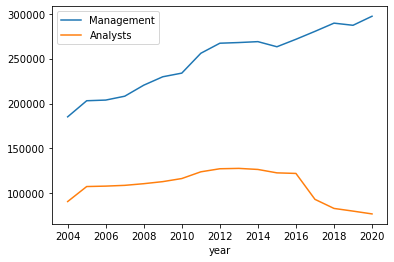

In [10]:
cc[cc['speaker_role'] == 'Management'].groupby('year').size().plot(label='Management', legend=True)
cc[cc['speaker_role'] == 'Analyst'].groupby('year').size().plot(label='Analysts', legend=True)

<AxesSubplot:xlabel='year'>

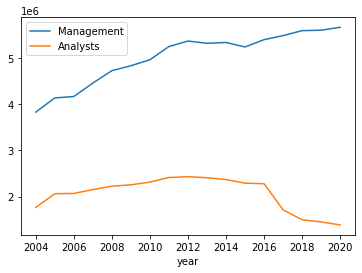

In [11]:
cc[cc['speaker_role'] == 'Management'].groupby('year')['num_words'].sum().plot(label='Management', legend=True)
cc[cc['speaker_role'] == 'Analyst'].groupby('year')['num_words'].sum().plot(label='Analysts', legend=True)

In [6]:
distribution = (cc.groupby('year')['transcript_id']
                  .nunique()
                  .sort_index()
                  .to_frame('Frequency')
                  .assign(Percent=lambda x: x['Frequency'] / x['Frequency'].sum() * 100,
                          Cumulative=lambda x: x['Percent'].cumsum())
                  .reset_index())
distribution

,year,Frequency,Percent,Cumulative
0,2004,1370,5.221634,5.221634
1,2005,1451,5.530358,10.751991
2,2006,1455,5.545604,16.297595
3,2007,1497,5.705683,22.003278
4,2008,1537,5.858139,27.861417
5,2009,1550,5.907688,33.769105
6,2010,1580,6.022030,39.791135
7,2011,1575,6.002973,45.794108
8,2012,1591,6.063955,51.858063
9,2013,1605,6.117315,57.975378
